In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
avo = pd.read_csv('../input/avocado-prices/avocado.csv', index_col=0)
avo.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


## Exploring the Dataset:

In [6]:
print('Database dimensions:', avo.shape, '\n')
print('Columns: \n')
for i in avo.columns:
    print(i)

Database dimensions: (18249, 13) 

Columns: 

Date
AveragePrice
Total Volume
4046
4225
4770
Total Bags
Small Bags
Large Bags
XLarge Bags
type
year
region


In [7]:
avo.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Production By Region:

In [8]:
avo['region'].value_counts()

Charlotte              338
SouthCarolina          338
Northeast              338
Columbus               338
RichmondNorfolk        338
Boston                 338
NewOrleansMobile       338
Boise                  338
GrandRapids            338
Plains                 338
Indianapolis           338
LasVegas               338
Chicago                338
RaleighGreensboro      338
Denver                 338
HarrisburgScranton     338
PhoenixTucson          338
TotalUS                338
SanFrancisco           338
Detroit                338
Jacksonville           338
Orlando                338
Tampa                  338
California             338
Roanoke                338
Syracuse               338
HartfordSpringfield    338
Louisville             338
Philadelphia           338
GreatLakes             338
CincinnatiDayton       338
SanDiego               338
MiamiFtLauderdale      338
Pittsburgh             338
Southeast              338
West                   338
Houston                338
S

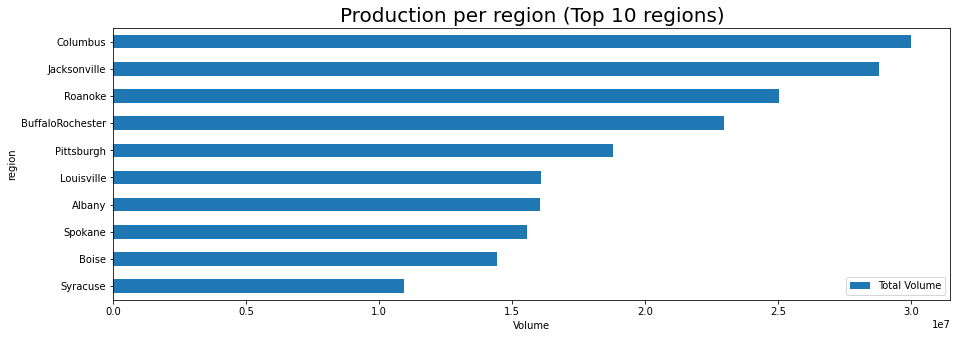

In [9]:
graph1 = avo.groupby('region')['Total Volume'].sum()

plt.figure(figsize=(15,5))
graph1.sort_values().head(10).plot.barh()

plt.title('Production per region (Top 10 regions)', fontsize=20)
plt.legend()
plt.xlabel('Volume')
plt.show()

## Total Verification Tes

In [10]:
avo['Calculated_Total'] = avo.iloc[:,7:10].sum(axis=1)
avo['Difference_in_total'] = avo['Total Bags'] - avo['Calculated_Total']

print('Reproted Total bags =', avo['Total Bags'].sum())
print('Calculated Total bags =', avo['Calculated_Total'].sum())
print('Difference in Total bags =', avo['Difference_in_total'].sum())

Reproted Total bags = 4373175798.389999
Calculated Total bags = 4373175785.389999
Difference in Total bags = 13.00000000181047


## Tracking the most type of avocado produced:

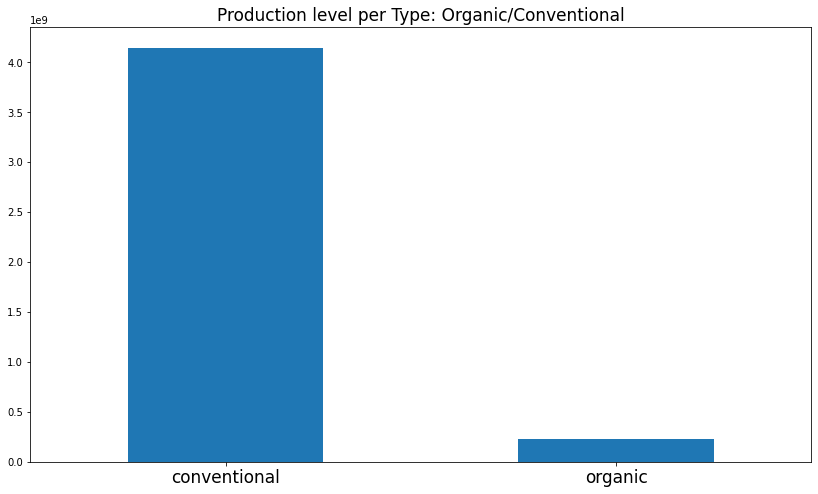

In [11]:
plt.figure(figsize=(14,8))
avo.groupby('type')['Total Bags'].sum().plot(kind='bar')
plt.xticks(rotation=0,fontsize=17)
plt.xlabel('')
plt.title('Production level per Type: Organic/Conventional', fontsize=17)
plt.show()

## Production By Seaonality (month-based):

In [12]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 18249 non-null  object 
 1   AveragePrice         18249 non-null  float64
 2   Total Volume         18249 non-null  float64
 3   4046                 18249 non-null  float64
 4   4225                 18249 non-null  float64
 5   4770                 18249 non-null  float64
 6   Total Bags           18249 non-null  float64
 7   Small Bags           18249 non-null  float64
 8   Large Bags           18249 non-null  float64
 9   XLarge Bags          18249 non-null  float64
 10  type                 18249 non-null  object 
 11  year                 18249 non-null  int64  
 12  region               18249 non-null  object 
 13  Calculated_Total     18249 non-null  float64
 14  Difference_in_total  18249 non-null  float64
dtypes: float64(11), int64(1), object(3)
mem

In [13]:
import datetime
avo.Date = pd.to_datetime(avo.Date)
avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 18249 non-null  datetime64[ns]
 1   AveragePrice         18249 non-null  float64       
 2   Total Volume         18249 non-null  float64       
 3   4046                 18249 non-null  float64       
 4   4225                 18249 non-null  float64       
 5   4770                 18249 non-null  float64       
 6   Total Bags           18249 non-null  float64       
 7   Small Bags           18249 non-null  float64       
 8   Large Bags           18249 non-null  float64       
 9   XLarge Bags          18249 non-null  float64       
 10  type                 18249 non-null  object        
 11  year                 18249 non-null  int64         
 12  region               18249 non-null  object        
 13  Calculated_Total     18249 non-nul

In [64]:
avo['month_name'] = avo.Date.apply (lambda x:x.strftime('%b'))

avo_per_mon = avo.groupby('month_name')['Total Volume'].sum().astype(int).reset_index()
avo_per_mon

,month_name,Total Volume
0,Apr,1235791676
1,Aug,1128374771
2,Dec,1086806543
3,Feb,1760528797
4,Jan,1756531092
5,Jul,1298880927
6,Jun,1202565548
7,Mar,1623951920
8,May,1470745116
9,Nov,954168681


The Highest volume of Avocado production during the year is within months of: month_name
Feb    1760528797
Jan    1756531092
Mar    1623951920
Name: Total Volume, dtype: int64


''

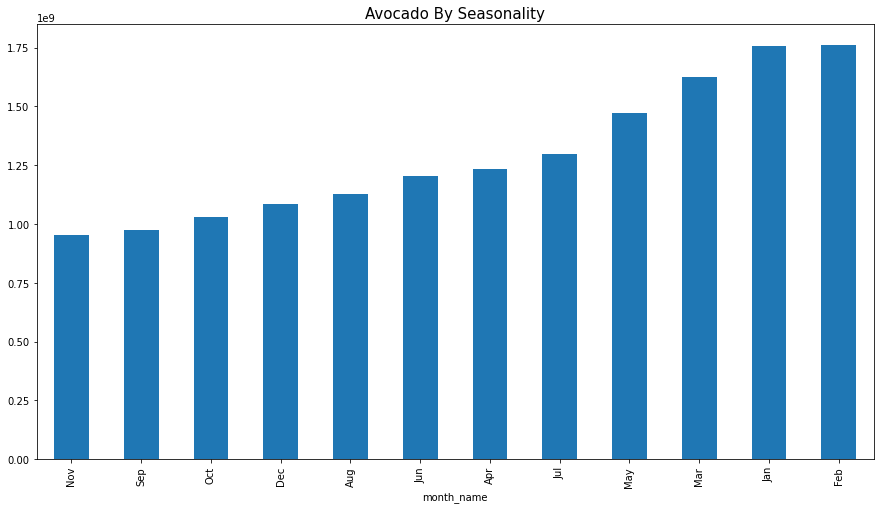

In [16]:
avo_per_mon.sort_values().plot(kind='bar', figsize=(15,8))
plt.title('Avocado By Seasonality', fontsize=15)

print('The Highest volume of Avocado production during the year is within months of: {}'.format(avo_per_mon.nlargest(3)))
;

## About the Price:

In [18]:
avo.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [48]:
avo.nlargest(5, 'AveragePrice')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Calculated_Total,Difference_in_total,month_name
8,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco,3232.16,0.000000e+00,Oct
37,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017,Tampa,1680.70,0.000000e+00,Apr
7,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016,SanFrancisco,3105.97,-4.547474e-13,Nov
42,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017,MiamiFtLauderdale,947.07,1.136868e-13,Mar
18,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017,RaleighGreensboro,7240.27,0.000000e+00,Aug


### ***Price goes up in months of low production Volume (Negative_relationship):***

In [62]:
avo_price = avo.groupby('month_name')['AveragePrice'].max().sort_values(ascending=False).reset_index()
avo_price

,month_name,AveragePrice
0,Oct,3.25
1,Apr,3.17
2,Nov,3.12
3,Mar,3.05
4,Aug,3.04
5,Sep,2.97
6,Jun,2.77
7,Jul,2.75
8,May,2.73
9,Jan,2.70


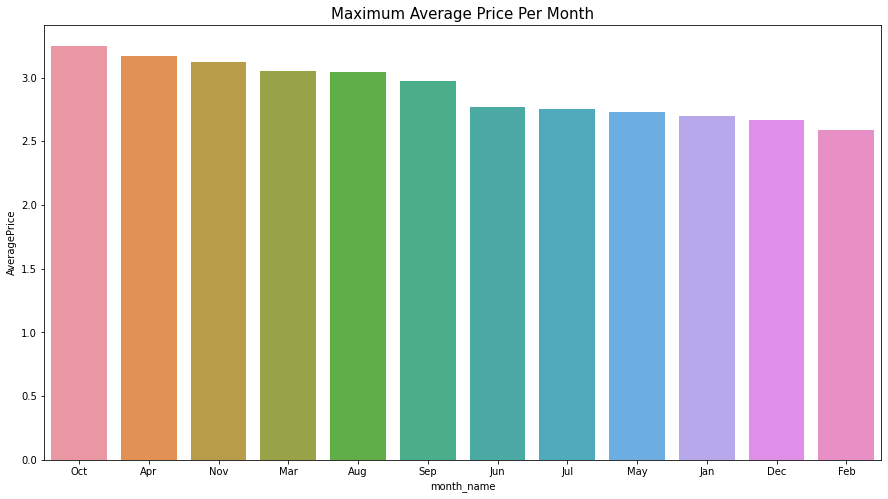

In [69]:
plt.figure(figsize=(15,8))
sns.barplot(x='month_name', y='AveragePrice', data=avo_price)
plt.title('Maximum Average Price Per Month', fontsize=15)
plt.show()